In [ ]:
#Description: This  program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#             to predict the closing stock price of a corporation(TESLA) using the past 60 day stock price.


In [ ]:
!pip install yahoo-fin

In [28]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from yahoo_fin.stock_info import *
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
#Get the stock quote
#Show the data
df = get_data("TSLA")
df

,open,high,low,close,adjclose,volume,ticker
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,TSLA
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,TSLA
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,TSLA
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,TSLA
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,TSLA
...,...,...,...,...,...,...,...
2021-11-12,1047.500000,1054.500000,1019.200012,1033.420044,1033.420044,25182300,TSLA
2021-11-15,1017.630005,1031.979980,978.599976,1013.390015,1013.390015,34775600,TSLA
2021-11-16,1003.309998,1057.199951,1002.179993,1054.729980,1054.729980,26542400,TSLA
2021-11-17,1063.510010,1119.640015,1055.500000,1089.010010,1089.010010,31445400,TSLA


In [ ]:
#Get the number of rows and columns in the data set
df.shape

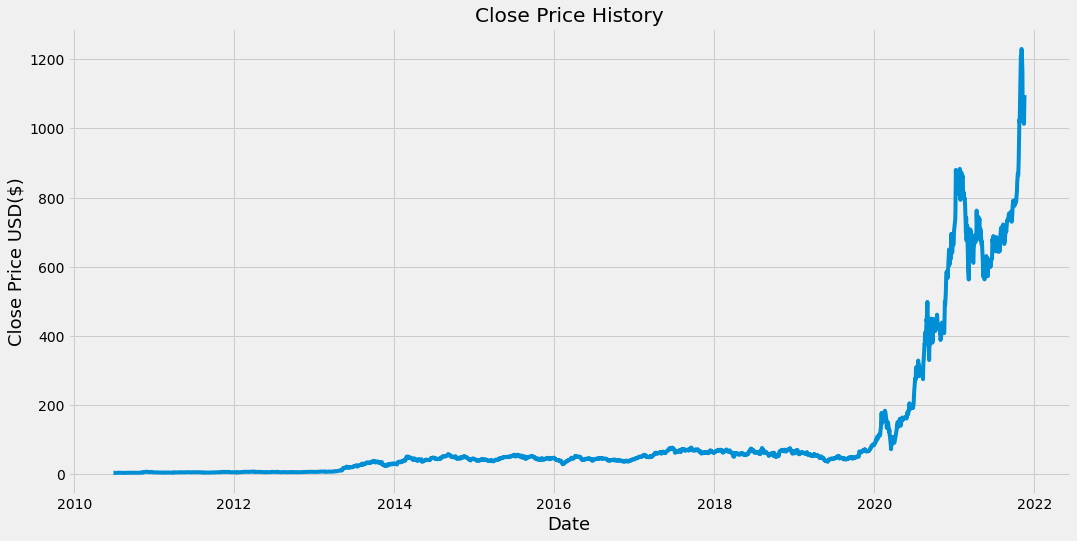

In [52]:
#Visualize  the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [53]:
#Create a new dataframe with only the 'Close column
data=df.filter(['close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2296

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

In [35]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [36]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2236, 60, 1)

In [37]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2236/2236 [==============================] - 63s 27ms/step - loss: 1.9278e-05


In [54]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [48]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [49]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [42]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

350.67772720748957

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


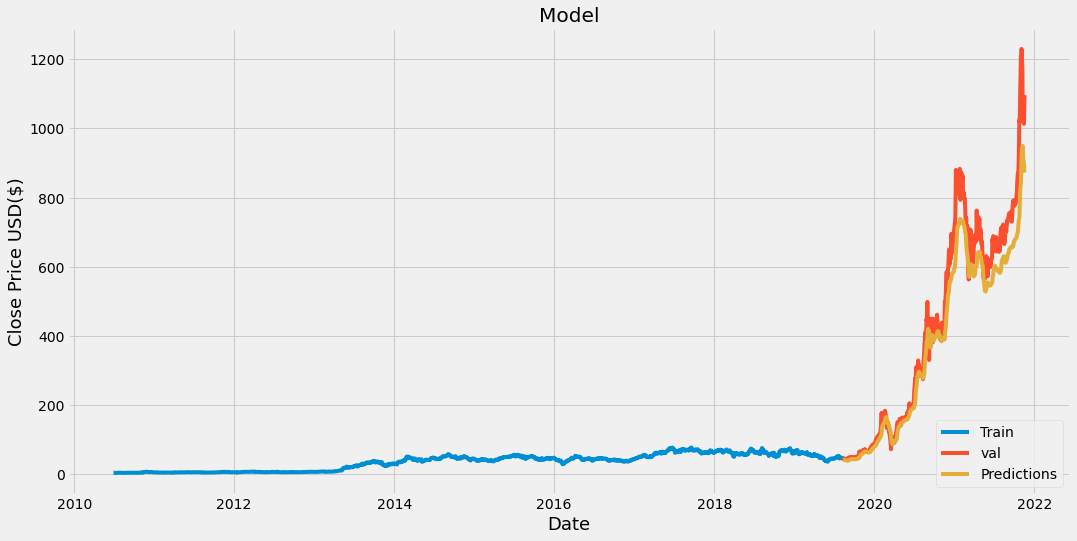

In [55]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'val', 'Predictions'], loc= 'lower right')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,close,Predictions
2019-08-13,47.000000,43.396030
2019-08-14,43.924000,43.386982
2019-08-15,43.127998,43.026344
2019-08-16,43.987999,42.442295
2019-08-19,45.366001,41.939674
...,...,...
2021-11-12,1033.420044,921.479675
2021-11-15,1013.390015,905.712280
2021-11-16,1054.729980,890.067627
2021-11-17,1089.010010,881.414001


In [23]:
#Get the quote
tsla_quote = get_data("TSLA")
#Create a new data frame
new_df = tsla_quote.filter(['close'])
#Get the last 60 dat closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test=[]
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[883.71716]]


In [ ]:
#Get the quote
tsla_quote2 = get_data("TSLA")
print(tsla_quote2['close'])